TITLE

INTRODUCTION

In order to answer this question, the "Communities and Crimes" dataset from the UCI Machine Learning Repository was chosen, which contains various socio-economic, law enforcement and crime statistics from the 1990 US Census, 1990 US LEMAS survey and 1995 FBI UCR (UCI). The data is unnormalized and observations are listed at the community level, which includes cities, townships, and boroughs.

PRELIMINARY EXPLORATORY DATA ANALYSIS

In [1]:
# Loads packages
library(tidyverse)
library(dbplyr)
library(repr)
library(tidymodels)
library(stringr)

# Set seed
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ rec

In [2]:
# Vector for column names
colnames <- c("communityname",
                "state",
                "countyCode",
                "communityCode",
                "fold",
                "population",
                "householdsize",
                "racepctblack",
                "racePctWhite",
                "racePctAsian",
                "racePctHisp",
                "agePct12t21",
                "agePct12t29",
                "agePct16t24",
                "agePct65up",
                "numbUrban",
                "pctUrban",
                "medIncome",
                "pctWWage",
                "pctWFarmSelf",
                "pctWInvInc",
                "pctWSocSec",
                "pctWPubAsst",
                "pctWRetire",
                "medFamInc",
                "perCapInc",
                "whitePerCap",
                "blackPerCap",
                "indianPerCap",
                "AsianPerCap",
                "OtherPerCap",
                "HispPerCap",
                "NumUnderPov",
                "PctPopUnderPov",
                "PctLess9thGrade",
                "PctNotHSGrad",
                "PctBSorMore",
                "PctUnemployed",
                "PctEmploy",
                "PctEmplManu",
                "PctEmplProfServ",
                "PctOccupManu",
                "PctOccupMgmtProf",
                "MalePctDivorce",
                "MalePctNevMarr",
                "FemalePctDiv",
                "TotalPctDiv",
                "PersPerFam",
                "PctFam2Par",
                "PctKids2Par",
                "PctYoungKids2Par",
                "PctTeen2Par",
                "PctWorkMomYoungKids",
                "PctWorkMom",
                "NumKidsBornNeverMar",
                "PctKidsBornNeverMar",
                "NumImmig",
                "PctImmigRecent",
                "PctImmigRec5",
                "PctImmigRec8",
                "PctImmigRec10",
                "PctRecentImmig",
                "PctRecImmig5",
                "PctRecImmig8",
                "PctRecImmig10",
                "PctSpeakEnglOnly",
                "PctNotSpeakEnglWell",
                "PctLargHouseFam",
                "PctLargHouseOccup",
                "PersPerOccupHous",
                "PersPerOwnOccHous",
                "PersPerRentOccHous",
                "PctPersOwnOccup",
                "PctPersDenseHous",
                "PctHousLess3BR",
                "MedNumBR",
                "HousVacant",
                "PctHousOccup",
                "PctHousOwnOcc",
                "PctVacantBoarded",
                "PctVacMore6Mos",
                "MedYrHousBuilt",
                "PctHousNoPhone",
                "PctWOFullPlumb",
                "OwnOccLowQuart",
                "OwnOccMedVal",
                "OwnOccHiQuart",
                "OwnOccQrange",
                "RentLowQ",
                "RentMedian",
                "RentHighQ",
                "RentQrange",
                "MedRent",
                "MedRentPctHousInc",
                "MedOwnCostPctInc",
                "MedOwnCostPctIncNoMtg",
                "NumInShelters",
                "NumStreet",
                "PctForeignBorn",
                "PctBornSameState",
                "PctSameHouse85",
                "PctSameCity85",
                "PctSameState85",
                "LemasSwornFT",
                "LemasSwFTPerPop",
                "LemasSwFTFieldOps",
                "LemasSwFTFieldPerPop",
                "LemasTotalReq",
                "LemasTotReqPerPop",
                "PolicReqPerOffic",
                "PolicPerPop",
                "RacialMatchCommPol",
                "PctPolicWhite",
                "PctPolicBlack",
                "PctPolicHisp",
                "PctPolicAsian",
                "PctPolicMinor",
                "OfficAssgnDrugUnits",
                "NumKindsDrugsSeiz",
                "PolicAveOTWorked",
                "LandArea",
                "PopDens",
                "PctUsePubTrans",
                "PolicCars",
                "PolicOperBudg",
                "LemasPctPolicOnPatr",
                "LemasGangUnitDeploy",
                "LemasPctOfficDrugUn",
                "PolicBudgPerPop",
                "murders",
                "murdPerPop",
                "rapes",
                "rapesPerPop",
                "robberies",
                "robbbPerPop",
                "assaults",
                "assaultPerPop",
                "burglaries",
                "burglPerPop",
                "larcenies",
                "larcPerPop",
                "autoTheft",
                "autoTheftPerPop",
                "arsons",
                "arsonsPerPop",
                "ViolentCrimesPerPop",
                "nonViolPerPop")

In [3]:
# Reads data in and specifies column names
crime <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt",
                  col_names = colnames)
                                
crime

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 2215 Columns: 147
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (42): communityname, state, countyCode, communityCode, LemasSwornFT, Le...
dbl (105): fold, population, householdsize, racepctblack, racePctWhite, race...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,⋯,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,⋯,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,⋯,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,⋯,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,⋯,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
Springfieldcity,MO,?,?,1,140494,2.45,2.51,95.65,0.90,⋯,2094,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42
Norwoodtown,MA,21,50250,1,28700,2.60,1.60,96.57,1.47,⋯,110,372.09,288,974.19,144,487.1,17,57.5,226.63,1890.88
Andersoncity,IN,?,?,1,59459,2.45,14.20,84.87,0.40,⋯,608,997.6,2250,3691.79,125,205.1,9,14.77,439.73,4909.26
Fargocity,ND,17,25700,1,74111,2.46,0.35,97.11,1.25,⋯,425,532.66,3149,3946.71,206,258.18,8,10.03,115.31,4747.58


As our analysis will only consist of the ratio of violent crime rate to non-violent crime rate, the columns for the individual crimes can be ignored in favour of the total violent and non-violent rates per capita. We also will select the population percentages by race, as these will be our predictor variables. Additionally, for the sake of readability, the names of the communities and their states will be included.

In [4]:
crime_selected <- crime |>
                    select(communityname, state, population, racepctblack:racePctHisp, ViolentCrimesPerPop, nonViolPerPop)
crime_selected

communityname,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop,nonViolPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
BerkeleyHeightstownship,NJ,11980,1.37,91.78,6.50,1.88,41.02,1394.59
Marpletownship,PA,23123,0.80,95.57,3.44,0.85,127.56,1955.95
Tigardcity,OR,29344,0.74,94.33,3.43,2.35,218.59,6167.51
Gloversvillecity,NY,16656,1.70,97.35,0.50,0.70,306.64,?
Bemidjicity,MN,11245,0.53,89.16,1.17,0.52,?,9988.79
Springfieldcity,MO,140494,2.51,95.65,0.90,0.95,442.95,6867.42
Norwoodtown,MA,28700,1.60,96.57,1.47,1.10,226.63,1890.88
Andersoncity,IN,59459,14.20,84.87,0.40,0.63,439.73,4909.26
Fargocity,ND,74111,0.35,97.11,1.25,0.73,115.31,4747.58


The ratio of the violent crime rate to the non-violent crime rate can be calculated by dividing the violent crime rate by the non-violent crime rate. However, two columns are of the character type—they need to be converted to the double type as the values contain decimals. After this is performed, the ratio can be calculated.

In [5]:
crime_w_ratio <- crime_selected |>
                mutate(ViolentCrimesPerPop = as.numeric(ViolentCrimesPerPop),
                       nonViolPerPop = as.numeric(nonViolPerPop)) |>
                mutate(crime_ratio = ViolentCrimesPerPop / nonViolPerPop)

crime_w_ratio

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


communityname,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop,nonViolPerPop,crime_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BerkeleyHeightstownship,NJ,11980,1.37,91.78,6.50,1.88,41.02,1394.59,0.02941366
Marpletownship,PA,23123,0.80,95.57,3.44,0.85,127.56,1955.95,0.06521639
Tigardcity,OR,29344,0.74,94.33,3.43,2.35,218.59,6167.51,0.03544218
Gloversvillecity,NY,16656,1.70,97.35,0.50,0.70,306.64,NA,NA
Bemidjicity,MN,11245,0.53,89.16,1.17,0.52,NA,9988.79,NA
Springfieldcity,MO,140494,2.51,95.65,0.90,0.95,442.95,6867.42,0.06450021
Norwoodtown,MA,28700,1.60,96.57,1.47,1.10,226.63,1890.88,0.11985425
Andersoncity,IN,59459,14.20,84.87,0.40,0.63,439.73,4909.26,0.08957154
Fargocity,ND,74111,0.35,97.11,1.25,0.73,115.31,4747.58,0.02428816


To perform regression, the dataset needs to be split into training and testing datasets. We will set aside 75% of our data to be our training dataset, and specify the crime_ratio column to be our target variable.

In [6]:
crime_split <- crime_w_ratio |>
                initial_split(prop = 0.75, strata = crime_ratio)

crime_training <- training(crime_split)
crime_testing <- testing(crime_split)

To obtain a general overview of the dataset and help build the model, summary statistics will be useful. We will exclude observations with missing values, thus, finding the number of observations with missing values will help us ensure that there is a sufficient quantity of data to train the model. It would also be helpful to find the mean and range of the racial percentages and crime ratio column, as an uneven distribution of data will affect the mean of the nearest k neighbours, and therefore the regression results. It may also be interesting to determine the count of community types; more larger communities lack a majority racial group compared to smaller communities (Farrell) while communities with more visitors tend to have higher crime rates (UCI) — this will be considered in the evaluation.

To begin, we apply the filter_all function to subset all rows with missing values, and obtain the number of rows.

In [7]:
cols <- colnames(crime_training)

missing_values <- crime_training |>
                    filter_all(any_vars(is.na(.))) |>
                    summarize(missing = n())
missing_values

missing
<int>
231


In order to calculate the mean and range, we then filter out rows with missing values.

In [8]:
crime_data <- crime_training |>
                filter_all(all_vars(!is.na(.)))

crime_data

variable_mean <- crime_data |>
                    select(racepctblack:racePctHisp, crime_ratio) |>
                    map_dfr(mean, na.rm = TRUE) |>
                    rename(racepctblack__mean = racepctblack,
                           racePctWhite__mean = racePctWhite,
                           racePctAsian__mean = racePctAsian,
                           racePctHisp__mean = racePctHisp,
                           crime_ratio__mean = crime_ratio)

variable_mean

variable_max <- crime_data |>
                    select(racepctblack:racePctHisp, crime_ratio) |>
                    map_dfr(max, na.rm = TRUE) |>
                    rename(racepctblack__max = racepctblack,
                           racePctWhite__max = racePctWhite,
                           racePctAsian__max = racePctAsian,
                           racePctHisp__max = racePctHisp,
                           crime_ratio__max = crime_ratio)

variable_max

variable_min <- crime_data |>
                    select(racepctblack:racePctHisp, crime_ratio) |>
                    map_dfr(min, na.rm = TRUE) |>
                    rename(racepctblack__min = racepctblack,
                           racePctWhite__min = racePctWhite,
                           racePctAsian__min = racePctAsian,
                           racePctHisp__min = racePctHisp,
                           crime_ratio__min = crime_ratio)
variable_min



communityname,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop,nonViolPerPop,crime_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BerkeleyHeightstownship,NJ,11980,1.37,91.78,6.50,1.88,41.02,1394.59,0.029413663
Tigardcity,OR,29344,0.74,94.33,3.43,2.35,218.59,6167.51,0.035442180
Fargocity,ND,74111,0.35,97.11,1.25,0.73,115.31,4747.58,0.024288164
Enfieldtown,CT,45532,2.65,95.72,1.04,2.28,89.94,3130.42,0.028730969
Lebanoncity,NH,12183,0.41,97.55,1.55,0.91,145.20,5461.00,0.026588537
Gorhamtown,ME,11856,0.37,98.84,0.40,0.45,16.72,919.73,0.018179248
Paragouldcity,AR,18540,0.09,99.39,0.18,0.51,92.91,3121.66,0.029763011
Marioncity,OH,34075,4.22,94.72,0.45,0.85,212.87,6403.36,0.033243485
OrmondBeachcity,FL,29721,3.52,95.13,1.03,1.70,142.70,4091.83,0.034874372


racepctblack__mean,racePctWhite__mean,racePctAsian__mean,racePctHisp__mean,crime_ratio__mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.1369,83.46732,2.894003,8.847936,0.1085395


racepctblack__max,racePctWhite__max,racePctAsian__max,racePctHisp__max,crime_ratio__max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
89.95,99.53,57.46,95.29,0.7016389


racepctblack__min,racePctWhite__min,racePctAsian__min,racePctHisp__min,crime_ratio__min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,7.21,0.06,0.12,0.002784566


Upon inspecting the crime_data table, the community names all include one of: borough, town, township, and city. Hence, we can use the str_detect function to filter for rows matching the respective characters.

In [9]:
borough_count <- crime_data |>
                filter(str_detect(communityname, "borough")) |>
                summarize(borough_count = n())

borough_count

town_count <- crime_data |>
                filter(str_detect(communityname, "town") & !str_detect(communityname, "township")) |>
                summarize(town_count = n())

town_count

township_count <- crime_data |>
                filter(str_detect(communityname, "township")) |>
                summarize(township_count = n())

township_count

city_count <- crime_data |>
                filter(str_detect(communityname, "city")) |>
                summarize(city_count = n())

city_count

borough_count
<int>
64


town_count
<int>
203


township_count
<int>
130


city_count
<int>
1040


In [10]:
crime_summary_1 <- tibble(variable_mean, variable_max, variable_min) |>
                pivot_longer(cols = everything(),
                             names_to = "metric",
                             values_to = "value") |>
                separate(col = metric,
                         into = c("variable", "metric"),
                         sep = "__") |>
                pivot_wider(names_from = metric,
                            values_from = value)
                

crime_summary_1

crime_summary_2 <- tibble(city_count, township_count, town_count, borough_count, missing_values)

crime_summary_2

variable,mean,max,min
<chr>,<dbl>,<dbl>,<dbl>
racepctblack,9.1368999,89.9500000,0.000000000
racePctWhite,83.4673198,99.5300000,7.210000000
racePctAsian,2.8940028,57.4600000,0.060000000
racePctHisp,8.8479356,95.2900000,0.120000000
crime_ratio,0.1085395,0.7016389,0.002784566


city_count,township_count,town_count,borough_count,missing
<int>,<int>,<int>,<int>,<int>
1040,130,203,64,231


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 231 rows containing missing values (geom_point).”


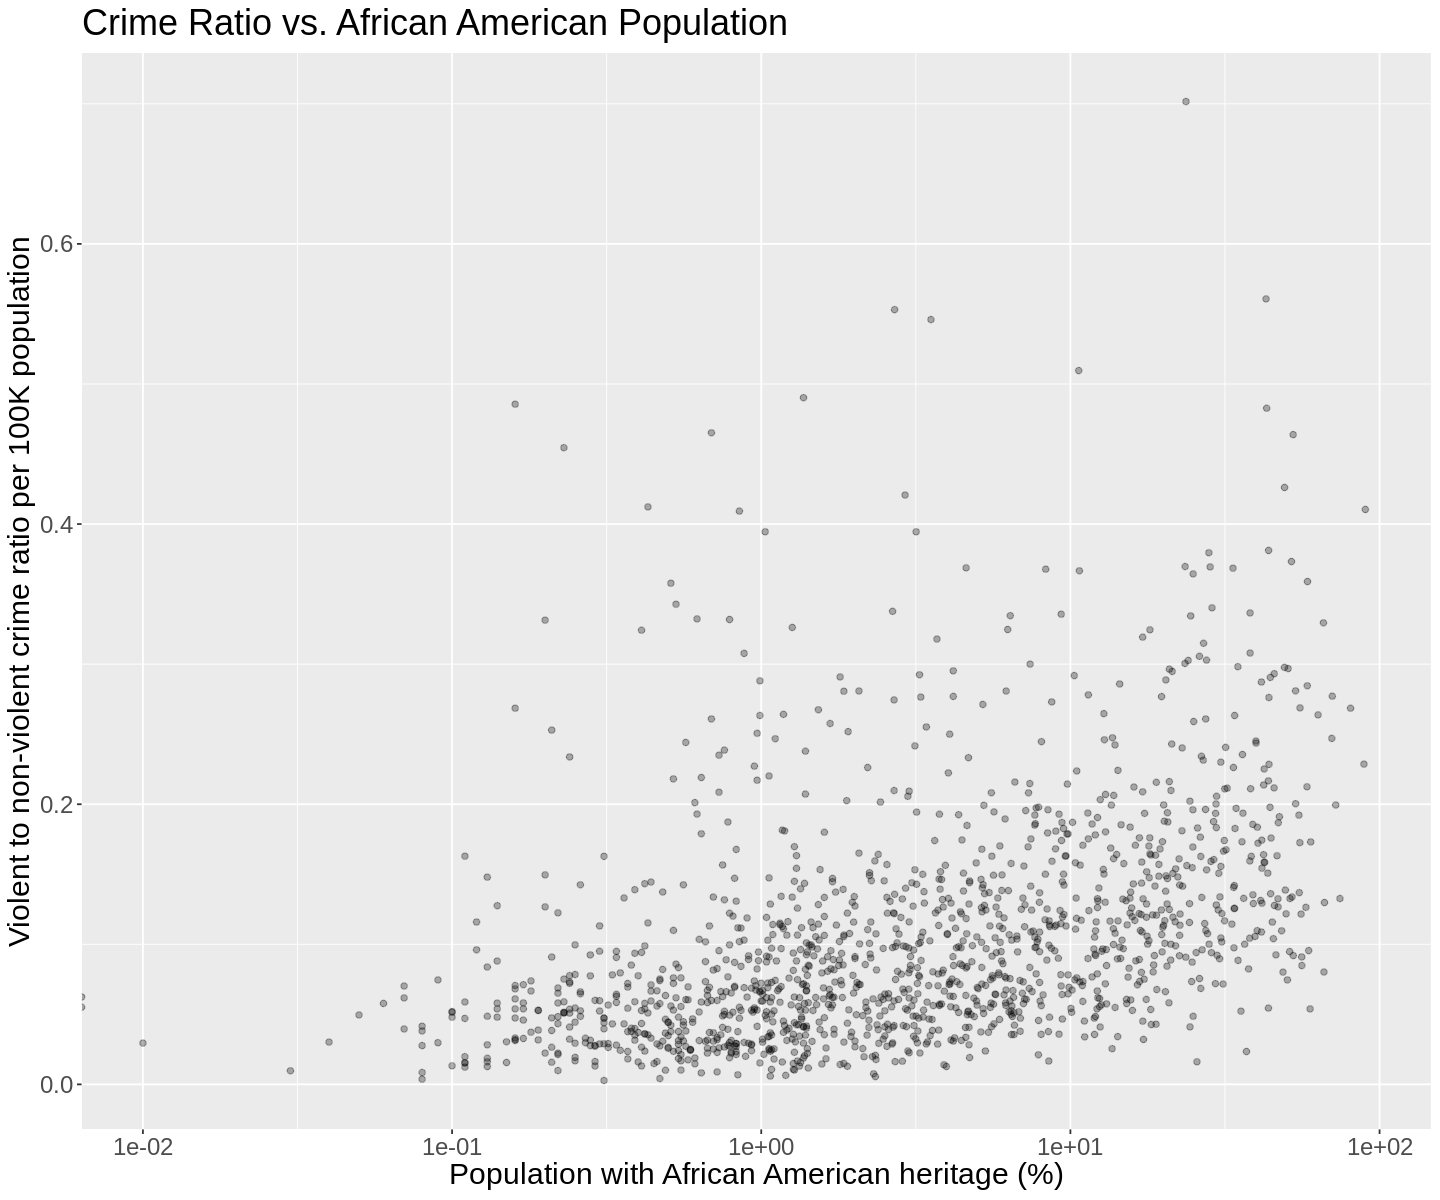

In [19]:
options(repr.plot.width = 12, repr.plot.height = 10)
crime_plot_black <- crime_training |>
                    ggplot(aes(x = racepctblack, y = crime_ratio)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with African American heritage (%)", y = "Violent to non-violent crime ratio per 100K population", title = "Crime Ratio vs. African American Population") +
                    theme(text = element_text(size = 18)) +
                    scale_x_log10()

crime_plot_black

METHODS

EXPECTED OUTCOMES AND SIGNIFICANCE

REFERENCES (need to format)

https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

U. S. Department of Commerce, Bureau of the Census, Census Of Population And Housing 1990 United States: Summary Tape File 1a & 3a (Computer Files),

U.S. Department Of Commerce, Bureau Of The Census Producer, Washington, DC and Inter-university Consortium for Political and Social Research Ann Arbor, Michigan. (1992)

U.S. Department of Justice, Bureau of Justice Statistics, Law Enforcement Management And Administrative Statistics (Computer File) U.S. Department Of Commerce, Bureau Of The Census Producer, Washington, DC and Inter-university Consortium for Political and Social Research Ann Arbor, Michigan. (1992)

U.S. Department of Justice, Federal Bureau of Investigation, Crime in the United States (Computer File) (1995)

Farrell, C. R., & Lee, B. A. (2016). No-Majority Communities: Racial Diversity and Change at the Local Level. Urban Affairs Review, 54(5), 866–897. doi:10.1177/1078087416682320